In [28]:
import os
import calendar
import pandas as pd
import numpy as np
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
import piplite
await piplite.install('seaborn')
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
%matplotlib inline

In [39]:
housing_df = pd.read_csv('BostonHousing.csv')
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
housing_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10,18.9,0


<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

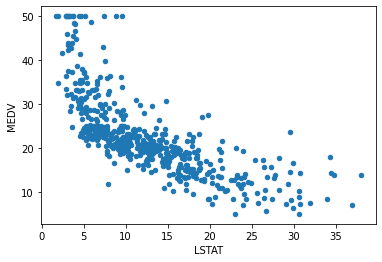

In [31]:
#PANDAs VERSION
housing_df.plot.scatter(x='LSTAT',y='MEDV',legend=False)



Text(0, 0.5, 'AVG.MEDV')

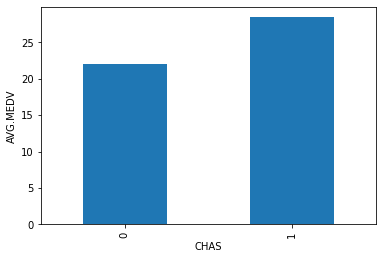

In [41]:
#Bar charts between CHAS VS mean.MEDV
ax = housing_df.groupby('CHAS').mean().MEDV.plot(kind='bar')
ax.set_ylabel('AVG.MEDV')

Text(0, 0.5, '% of CAT.MEDV')

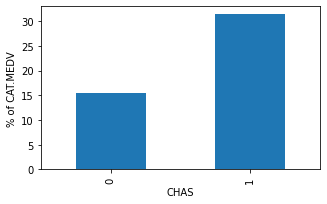

In [44]:
dataForPLot = housing_df.groupby('CHAS')['CAT_MEDV'].agg('mean') *100
ax=dataForPLot.plot(kind='bar', figsize=[5,3])
ax.set_ylabel('% of CAT.MEDV')

Text(0, 0.5, 'MEDV')

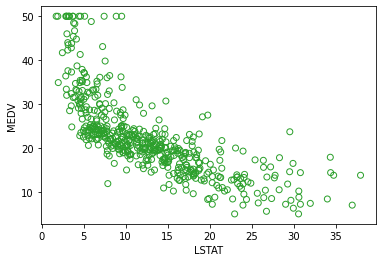

In [45]:
#Matplotlib version

plt.scatter(housing_df.LSTAT,housing_df.MEDV, color = 'C2', facecolor='none')
plt.xlabel('LSTAT');plt.ylabel('MEDV')

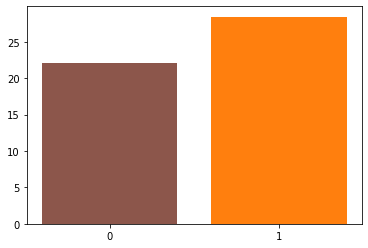

<class 'ValueError'>: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (5).

In [50]:
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig,ax = plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['C5','C1'])
ax.set_xticks([0,1],False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')

Text(0, 0.5, 'count')

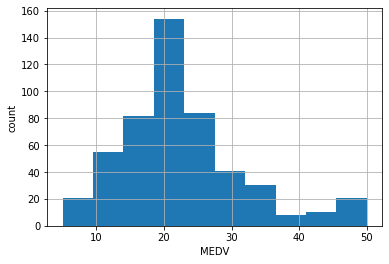

In [51]:
#Histogram in pandas
ax = housing_df.MEDV.hist()
ax.set_xlabel('MEDV');ax.set_ylabel('count')

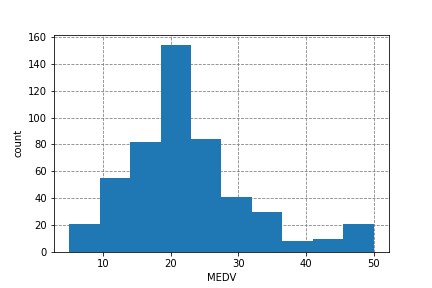

<Figure size 432x288 with 0 Axes>

In [52]:
fig,ax=plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True)
ax.grid(which='major',color='grey',linestyle='--')
ax.set_xlabel('MEDV');ax.set_ylabel('count')
plt.show()

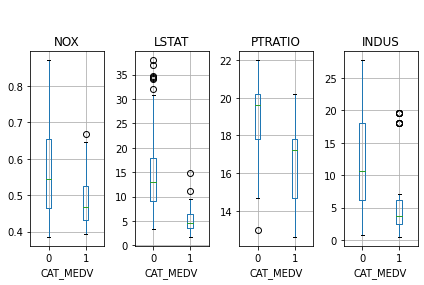

In [54]:
fig,axes=plt.subplots(nrows=1,ncols=4)
housing_df.boxplot(column='NOX',by='CAT_MEDV',ax=axes[0])
housing_df.boxplot(column='LSTAT',by='CAT_MEDV',ax=axes[1])
housing_df.boxplot(column='PTRATIO',by='CAT_MEDV',ax=axes[2])
housing_df.boxplot(column='INDUS',by='CAT_MEDV',ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT_MEDV')
plt.suptitle(' ')
plt.tight_layout()

<AxesSubplot:>

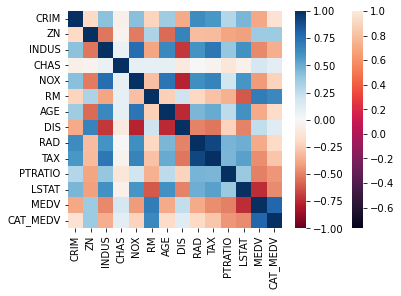

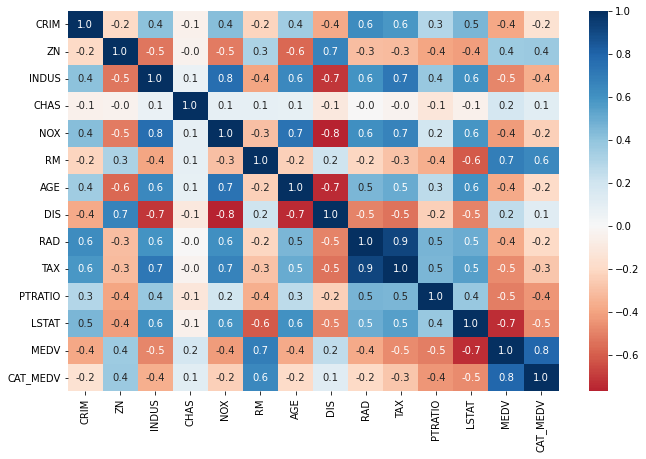

In [57]:
corr = housing_df.corr()
sns.heatmap(corr, xticklabels =corr.columns,yticklabels=corr.columns)


#changing the colormap to a divergent scale and fix the color map
sns.heatmap(corr, xticklabels =corr.columns,yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

fig,ax =plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0,ax=ax)


<function pyolite.patches.patch_matplotlib.<locals>.show(close=None, block=None)>

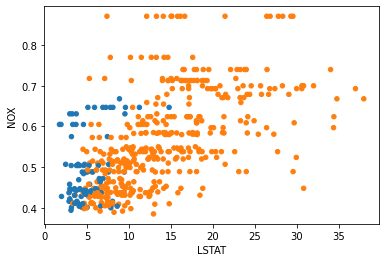

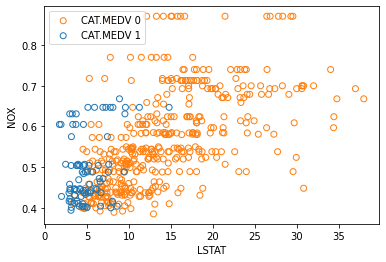

In [61]:
housing_df.plot.scatter(x='LSTAT',y='NOX',c=['C0' if c==1 else 'C1' for c in housing_df.CAT_MEDV])

_,ax = plt.subplots()
for catValue, color in (0,'C1'), (1,'C0'):
    subset_df = housing_df[housing_df.CAT_MEDV == catValue]
    ax.scatter(subset_df.LSTAT, subset_df.NOX, color='none', edgecolor=color)
ax.set_xlabel('LSTAT')
ax.set_ylabel('NOX')
ax.legend(["CAT.MEDV 0", "CAT.MEDV 1"])
plt.show

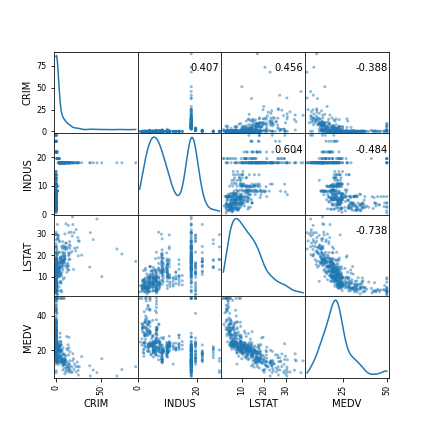

<Figure size 432x432 with 0 Axes>

In [64]:
df=housing_df[['CRIM','INDUS','LSTAT','MEDV']]
axes=scatter_matrix(df, alpha=0.5, figsize=(6,6), diagonal='kde')
corr=df.corr().values
for i,j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i,j].annotate('%.3f' %corr[i,j], (0.8,0.8), xycoords='axes fraction',ha='center',va='center')
plt.show()

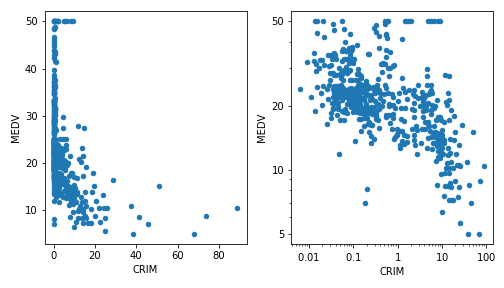

<Figure size 504x288 with 0 Axes>

In [72]:
#REscaling
plt.rcParams['axes.formatter.min_exponent'] = 4
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(7,4))
housing_df.plot.scatter(x='CRIM', y='MEDV',ax=axes[0])

ax=housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])
ax.set_yticks([5,10,20,50])
ax.set_yticklabels([5,10,20,50])
plt.tight_layout();plt.show()


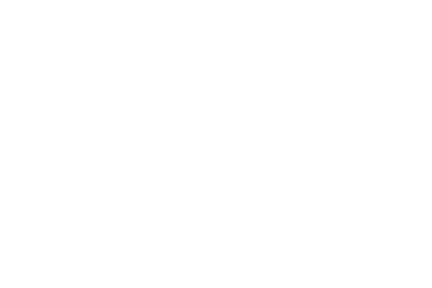

<Figure size 432x288 with 0 Axes>